/home/giancos/anaconda3/envs/Soccer-Detection/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


/media/giancos/Football/dataset_crop224/england_epl/2014-2015/2015-05-17 - 18-00 Manchester United 1 - 1 Arsenal


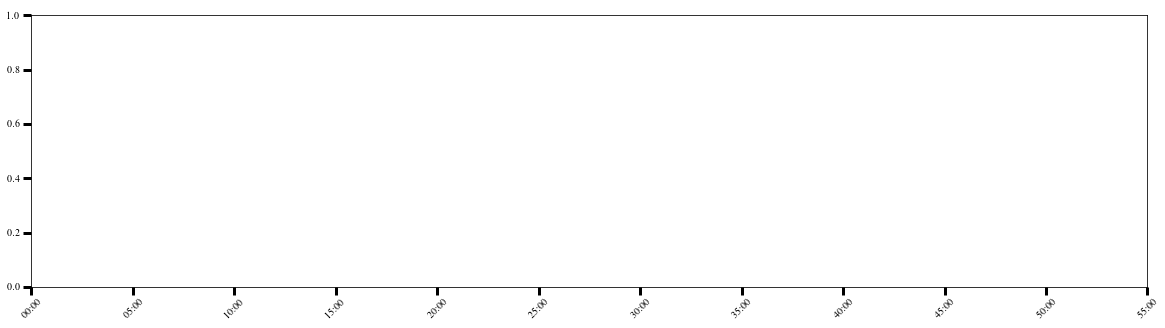

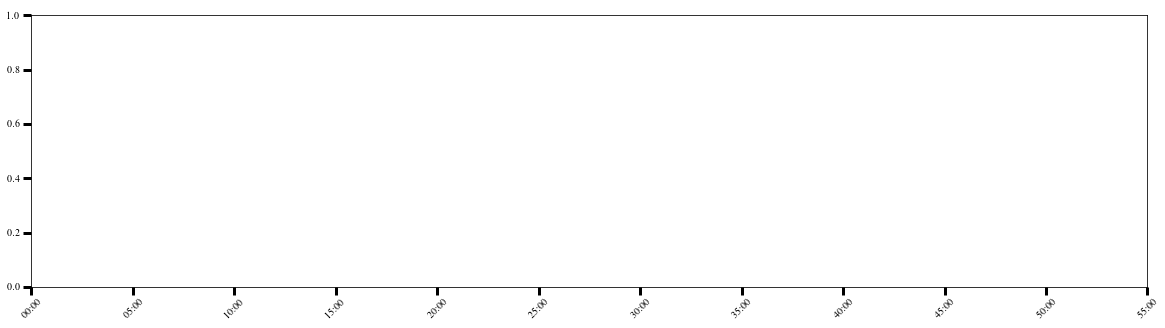

In [23]:
from matplotlib import pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib.image as mpimg

import numpy as np
import matplotlib

import numpy as np
import os
import json
from tqdm import tqdm
import skvideo.io
from __future__ import absolute_import, division

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
import matplotlib as mpl
from matplotlib.offsetbox import AnchoredText
import matplotlib.patches as patches
import os
import shutil



def get_spot_from_Center(array, thresh=0.5):
    """Return the border of a prediction at a given watershed threshold"""
    diff1 = np.insert(array,0,0)
    diff2 = np.append(array,0)
    t_init = np.argwhere( (diff1<thresh) & (diff2>=thresh))[:,0]
    t_end  = np.argwhere( (diff1>thresh) & (diff2<=thresh))[:,0]
    score = np.zeros(len(t_end))
    t_spot = np.zeros(len(t_end))
    for i in range(len(t_end)):
        score[i] = np.mean(array[t_init[i]:t_end[i]])
        t_spot[i] = (t_init[i] + t_end[i]) / 2
        score[i] = array[int(t_spot[i])]
    segment_predictions = np.transpose([t_init, t_end])
    return  np.transpose([t_spot, score])



            

path_data_dirname = "/media/giancos/Football/dataset_crop224/"

labels = ["background", "card", "substitution", "goal"]

gamePath = "england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/"

c=["k", "b", "g", "r"]




# gamePath = "england_epl/2014-2015/2015-05-17 - 18-00 Manchester United 1 - 1 Arsenal/"
# gamePath = "england_epl/2014-2015/2015-05-17 - 18-00 Manchester United 1 - 1 Arsenal/"
# for gamePath in np.load(os.path.join(path_data_dirname, "listgame_test_100.npy")):

for gamePath in np.load(os.path.join(path_data_dirname, "listgame_test_100.npy"))[0:1]:
# for gamePath in [np.load(os.path.join(path_data_dirname, "listgame_test_100.npy"))[2],
#                  np.load(os.path.join(path_data_dirname, "listgame_valid_100.npy"))[0],
#                  np.load(os.path.join(path_data_dirname, "listgame_train_300.npy"))[0]]:
                 
#     print(gamePath)
    
    
# for gamePath in [np.load(os.path.join(path_data_dirname, "listgame_test_100.npy"))[:]]:


    print(os.path.join(path_data_dirname, gamePath))

    
    for half in [1,2]:
    
    
        predictions = np.load(os.path.join(path_data_dirname, gamePath, "Predictions_Half_"+str(half)+".npy"))
        videogen = skvideo.io.vreader(os.path.join(path_data_dirname, gamePath, str(half)+".mkv"),  backend='ffmpeg')
        index_frame = 0

        
        
#         plt.figure(1, figsize=(20, 2))
          # Global config.
        params = {
           'font.family': 'serif','font.serif': 'Times',
           'text.usetex': True,
           'xtick.major.size': 8,
           'ytick.major.size': 8,
           'xtick.major.width': 3,
           'ytick.major.width': 3,
           }
        matplotlib.rcParams.update(params)


        gs = gridspec.GridSpec(2, 10, height_ratios=None)
        gs.update(wspace=0.025) # set the spacing between axes. 

        fig = plt.figure(figsize=(20, 5))
        transFigure = fig.transFigure.inverted()

       
     
        
        
        
        frames_axes = []
        
        # PLOT PREDICTIONS
        for i_label in [1,2,3]:
            videogen = skvideo.io.vreader(os.path.join(path_data_dirname, gamePath, str(half)+".mkv"),  backend='ffmpeg')

            index_frame = 0
            i=0

            spots = get_spot_from_Center(predictions[:,i_label])
#             plt.plot(predictions[:,i_label], color = c[i_label])     
            for spot in spots:
#                 plt.plot([spot[0],spot[0]], [1,1+spot[1]], color = c[i_label])
                frame_fileName = os.path.join(path_data_dirname, gamePath,
                                              "Prediction_%1d_%02d_%02d_" % (half, spot[0]//60, spot[0]%60) + labels[i_label] + ".png")
                if (os.path.exists(frame_fileName)):
                    arr_img = plt.imread(frame_fileName)

                else:
                    for frame in videogen:
                        index_frame = index_frame + 1  
                        if (index_frame >= spot[0]*25.0):
                            arr_img = frame
                            skvideo.io.vwrite(frame_fileName, arr_img)
                            
                           # draw frames
#                             frames_axes = [None]*(len(frames_idxs))
#                             for i,j in enumerate(frames_idxs):
                            frames_axes.append(plt.subplot(gs[:1,i]))
                            plt.axis('off')
                            plt.imshow(frame_images[i])
                            plt.title('t=%.1f sec' % (jumps[j]),fontsize=fontsize/1.1)
                            
                            i = i+1
                            break

        
        
#         #add borders to last frame
#         autoAxis = frames_axes[-1].axis()
#         rec = patches.Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,
#                         (autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=end_border_thikness,color=end_color)
#         rec = frames_axes[-1].add_patch(rec)
#         rec.set_clip_on(False)
    
    
    
    
    
    
        # PLOT LABELS
        with open(os.path.join(path_data_dirname, gamePath, "Labels.json")) as file :
            JsonFile = json.loads(file.read())

            for i, myEvent in enumerate(JsonFile['annotations']):
                if (int(myEvent['gameTime'][:1]) == half):
                    second = int(myEvent['gameTime'][-2:])
                    minute = int(myEvent['gameTime'][-5:-3])
            
                    if "soccer" in myEvent['label']: current_index_label = 3
                    elif "substitution" in myEvent['label']: current_index_label = 2
                    elif "card" in myEvent['label']: current_index_label = 1
                    else: current_index_label = 0
                    
                    t = minute*60 + second     
                    
#                     plt.plot([t,t], [2.2,3.0], color = c[current_index_label])
                
                
                
        plt.xticks([t for t in range(0,3500,300) ], 
                                      [ "%02d:%02d"%(t//60, t%60) for t in range(0,3500,300)], 
                                      rotation=45)

        plt.show()
    
    

In [10]:
    
    
    
#     with open(os.path.join(path_data_dirname, gamePath, "Labels.json")) as file :
#         JsonFile = json.loads(file.read())

#         print(len(JsonFile['annotations']))




#         fig, axs = plt.subplots(1,len(JsonFile['annotations']),num=None, 
#                 figsize=(2*len(JsonFile['annotations']), 3), 
#                 dpi=100, 
#                 facecolor='w',
#                 edgecolor='k',
#                                sharey=True)


#         half = 2
#         for i, myEvent in enumerate(JsonFile['annotations']):
#             if (half == 2 and int(myEvent['gameTime'][:1]) == 1):
#                 videogen = skvideo.io.vreader(os.path.join(path_data_dirname, gamePath, "1.mkv"),  backend='ffmpeg')
#                 index_frame = 0
#             elif (half == 1 and int(myEvent['gameTime'][:1]) == 2):
#                 videogen = skvideo.io.vreader(os.path.join(path_data_dirname, gamePath, "2.mkv"),  backend='ffmpeg')
#                 index_frame = 0


#             half = int(myEvent['gameTime'][:1])
#             second = int(myEvent['gameTime'][-2:])
#             minute = int(myEvent['gameTime'][-5:-3])

#             t[i]=minute*60+second     

#             if (half == 1):
#                 predictions = np.load(os.path.join(path_data_dirname, gamePath, "Predictions_augm_50_Half_1.npy"))
#                 predictions = np.load(os.path.join(path_data_dirname, gamePath, "Predictions_Half_1.npy"))
#             elif (half == 2):
#                 predictions = np.load(os.path.join(path_data_dirname, gamePath, "Predictions_augm_50_Half_2.npy"))
#                 predictions = np.load(os.path.join(path_data_dirname, gamePath, "Predictions_Half_2.npy"))

                
#             frame_fileName = os.path.join(path_data_dirname, gamePath,
#                                           "Prediction_%1d_%02d_%02d_" % (half, minute, second) +  myEvent['label'] + ".png")
# #             print(frame_fileName)
#             if (os.path.exists(frame_fileName)):
# #                 print("exist")                
#                 arr_img = plt.imread(frame_fileName)
            
#             else:
#                 print("NOT exist")
#                 continue
                    


                    



#             ax = axs[i]
#             ax.set_axisbelow(True)
#             ax.xaxis.grid(color='gray', linestyle='dashed')
#             ax.yaxis.grid(color='gray', linestyle='dashed')


# #             ax.plot( [t,t], 
# #                     [0,1],
# #                     linewidth=4.0, color="k")

#             labels= ["background", "card", "substitution", "goal"]
#             c=["k", "b", "g", "r"]

#             for i_label in [1,2,3]:
#                 i_init = np.max([t-60, 0]) 
#                 i_end = np.min([t+60, len(predictions[:,i_label])]) 
#                 ax.plot(np.arange(i_init,i_end), 
#                         predictions[i_init:i_end,i_label],
#                         linewidth=4.0, color=c[i_label], label=labels[i_label])



#             ax.tick_params(axis='both', which='major', labelsize=20)
#             plt.sca(ax)
            
#             off = 40
#             time_init = "%1d-%02d:%02d" % (half, (t-off)//60, (t-off)%60)
#             time_end = "%1d-%02d:%02d" % (half, (t+off)//60, (t+off)%60)
#             time_t = "%1d-%02d:%02d" % (half, t//60, t%60)
            
#             locs, labels = plt.xticks([t-off, t, t+off], 
#                                       [time_init, time_t, time_end], 
#                                       rotation=45)


            
        

#             from matplotlib.patches import Circle
#             from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
#                                               AnnotationBbox)
#             from matplotlib.cbook import get_sample_data


#             imagebox = OffsetImage(arr_img, zoom=0.4)
#             imagebox.image.axes = ax



#             current_index_label = myEvent['label']
            
#             if "soccer" in myEvent['label']: color = c[3]
#             elif "substitution" in myEvent['label']: color = c[2]
#             elif "card" in myEvent['label']: color = c[1]
#             else: color = c[0]

                
# #             if predictions(t,?) >= 0.5: linestyle="-"
# #             elif predictions(t,?) < 0.5: linestyle='--'
#             linestyle='--'
                
#             ab = AnnotationBbox(imagebox, (t,1),
#                              xybox=(-0., 70.),
#                             xycoords='data',
#                             boxcoords="offset points",
#                             pad=0.3,
#                             bboxprops=dict( linestyle=linestyle,linewidth=3),
#                             arrowprops=dict(arrowstyle="->",color=color,linewidth=3))

#             ax.add_artist(ab)

            
#             ax.set_ylim(0, 3)
#             plt.sca(ax)
#             plt.yticks([0,1])
            
            
            
            
# #         box = ax.get_position()
# #         ax.set_position([box.x0, box.y0 + box.height * 0.1,
# #         box.width, box.height * 0.9])
# #         ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
# #                   fancybox=True, shadow=True, ncol=5)

# #         from matplotlib.font_manager import FontProperties

# #         fontP = FontProperties()
# #         fontP.set_size('small')
# #         legend([plot1], "title", prop=fontP)

#         plt.show()

# #         path_figure = os.path.join(path_data_dirname, gamePath, "QualitativeResults.png")
# #         fig.savefig(path_figure, bbox_inches='tight')

/media/giancos/Football/dataset_crop224/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley
[[  2.40950000e+03   9.99993205e-01]]
[[  2.21350000e+03   5.09701967e-01]
 [  2.22850000e+03   9.90888119e-01]]
[[  7.99500000e+02   1.00000000e+00]
 [  2.29700000e+03   8.05859506e-01]]


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [92]:
# Red in Goal, Blue is card, Green is substitution